In [1]:
from gensim.models import word2vec

In [2]:
def generate_vectors():
    model = word2vec.Word2Vec(word2vec.LineSentence('名詞.txt'),
                     size=70, window=5, min_count=1,iter=5)
    model.save('ayane_w2v.model')

In [3]:
generate_vectors()

In [4]:
model = word2vec.Word2Vec.load('ayane_w2v.model')

words = ['握手会','アンダーライブ','舞台']
for word in words:
    similar_words = model.most_similar(positive=[word])
    print(word,':',[w[0] for w in similar_words])

握手会 : ['週刊プレイボーイ2018', '後世', '芝居', '方たち', '表紙', '片手', '山下美月ちゃん', 'ごちそう', '起源図鑑', '切り取り線']
アンダーライブ : ['堀未央奈ちゃんプロデュース', '残念個人的', 'サンリオピューロランド', '自然', '正確', '雑誌', 'ジコチューコーナー福岡公演', '無事2時間', '♪毎年東北', '横堀さん']
舞台 : ['見舞い', '経験', '勉強', '9月10日発売月刊ニュータイプ様9月25日発売anan様9月30日発売BUBKA様10月9日発売BOMB様毎週水曜日放送水曜日', '仙台', '方', '交流', 'ジオウ楽しみ', '是非ご覧', 'MV']


C:\Users\g031p122\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties

In [6]:
def create_wordcloud(text):
    fpath = "Mamelon.otf"
    wordcloud = WordCloud(background_color="white",font_path=fpath, width=900, height=500).generate(text)

    plt.figure(figsize=(15,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    wordcloud.to_file("ayane.png")

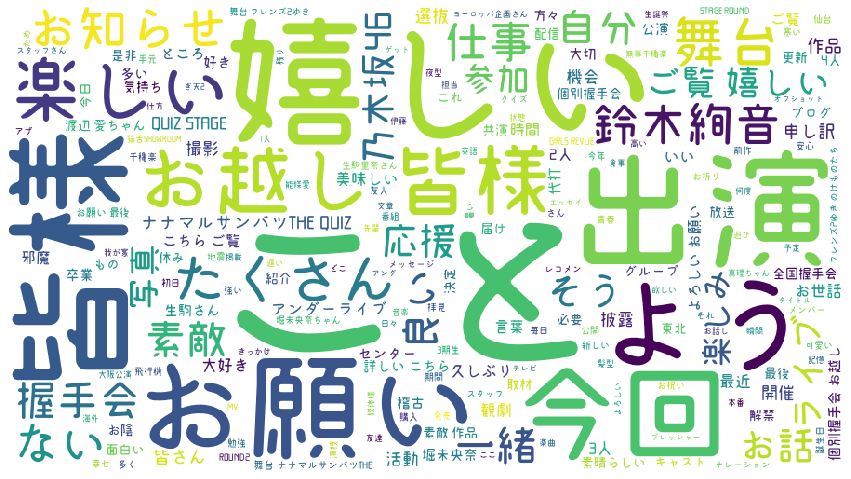

In [7]:
f = open('名詞＿形容詞＿形容動詞.txt', encoding='utf-8')
text = f.read()
f.close
create_wordcloud(text)

In [8]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import collections

In [9]:
def count(text):
    c = collections.Counter(text)
    mc = c.most_common()
    value = []
    count = []
    for i in range(10):
        value.append(mc[i][0])
        count.append(mc[i][1])
    
    print(mc)

    fp = FontProperties(fname=r'Mamelon.otf')
    plt.figure(figsize=(20, 10), dpi=50)
    plt.title("鈴木絢音ブログ頻出単語TOP10", fontproperties=fp, fontsize=24)
    plt.xlabel('出現頻度が多い10単語', fontproperties=fp,fontsize=22)
    plt.ylabel('出現頻度数', fontproperties=fp, fontsize=22)

    x = np.arange(len(value))
    plt.xticks(x,value,fontproperties=fp,fontsize=18)
    plt.yticks(fontsize=18)
    y = np.array(count)
    plt.bar(x,y)
    plt.savefig('bar_word.png')
    plt.show()

[(' ', 3642), ('い', 340), ('ー', 279), ('ん', 254), ('ン', 225), ('日', 217), ('し', 213), ('2', 174), ('さ', 166), ('こ', 162), ('1', 156), ('お', 150), ('と', 135), ('ち', 121), ('イ', 111), ('月', 103), ('演', 100), ('様', 96), ('ア', 94), ('ゃ', 87), ('ス', 86), ('ル', 86), ('ラ', 86), ('皆', 84), ('0', 84), ('の', 81), ('ッ', 76), ('シ', 74), ('4', 70), ('ト', 69), ('私', 67), ('人', 67), ('楽', 67), ('今', 65), ('会', 64), ('6', 63), ('嬉', 62), ('生', 61), ('木', 60), ('手', 60), ('E', 60), ('ナ', 59), ('大', 58), ('3', 58), ('ク', 58), ('出', 55), ('中', 54), ('り', 53), ('ブ', 53), ('レ', 52), ('ら', 51), ('マ', 49), ('う', 49), ('タ', 49), ('た', 48), ('奈', 48), ('ジ', 47), ('間', 47), ('本', 46), ('台', 46), ('フ', 46), ('S', 46), ('願', 45), ('時', 45), ('T', 45), ('よ', 44), ('メ', 44), ('R', 44), ('発', 43), ('バ', 42), ('テ', 42), ('ロ', 41), ('方', 41), ('プ', 40), ('握', 40), ('ュ', 39), ('乃', 39), ('舞', 38), ('売', 38), ('コ', 38), ('リ', 38), ('サ', 37), ('ツ', 37), ('ダ', 37), ('O', 36), ('年', 35), ('グ', 35), ('き', 35), ('9', 35), ('

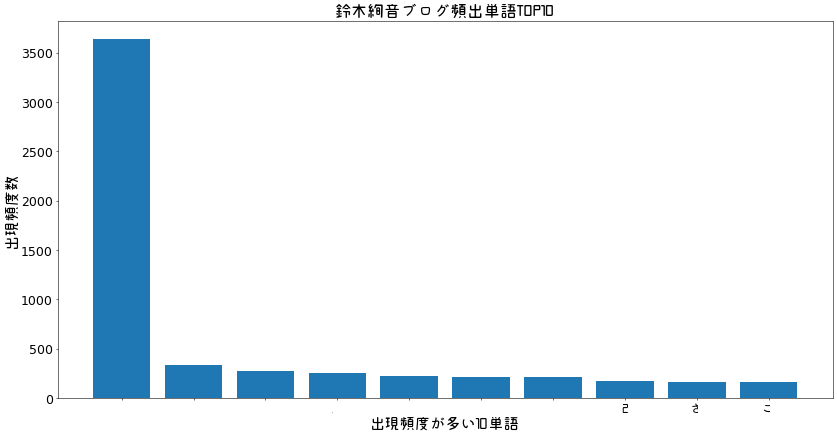

In [10]:
count(text)

In [14]:
import oseti
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [15]:
def negapozi(text):
    analyzer = oseti.Analyzer()
    n = analyzer.count_polarity(text)
    posi = 0
    nega = 0
    for item in n:
        posi += item['positive']
        nega += item['negative']

    x = np.array([posi,nega])
    fp = FontProperties(fname=r'Mamelon.otf')
    label = ["positive","negative"]
    colors = ["lightcoral","lightblue"]
    plt.figure(figsize=(11, 8), dpi=50)
    plt.title("鈴木絢音ブログネガポジ判定",fontproperties=fp,fontsize = 24)
    plt.rcParams['font.size'] = 20
    plt.pie(x,counterclock=False,startangle=90,colors=colors,autopct="%1.1f%%")
    plt.legend(label, fontsize=20,bbox_to_anchor=(0.9, 0.7))
    plt.savefig('negaposi.png')
    plt.show()

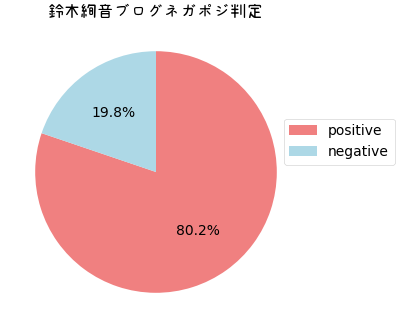

In [16]:
f = open('名詞＿形容詞＿形容動詞＿動詞.txt', encoding='utf-8')
text = f.read()
f.close
negapozi(text)